In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
heart_data = pd.read_csv('/content/drive/MyDrive/Heart Disease /heart_cleveland_upload.csv')

# view first 5 records
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


####**Data Types & Non-null Values**

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


####**No missing value**

####**Summary Statistics**

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### **RESEARCH QUESTION ONE: What are the key risk factors most associated with heart disease?**

#### **Correlation Analysis**

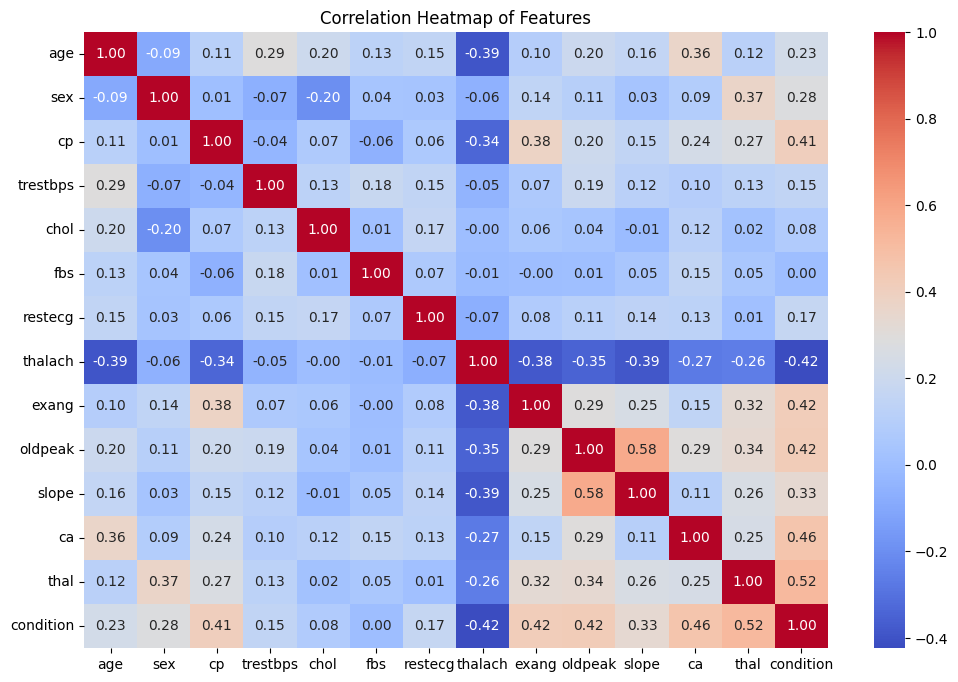

In [7]:
# Correlation Analysis
# ------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


In [8]:
#  df and the target variable is 'condition'
correlation_matrix = heart_data.corr()

# Create a DataFrame for correlation with the target and sort by correlation strength
correlation_table = correlation_matrix[['condition']].sort_values(by='condition', ascending=False)
correlation_table.reset_index(inplace=True)
correlation_table.columns = ['Feature', 'Correlation_with_Condition']

# Display the correlation table
correlation_table


,Feature,Correlation_with_Condition
0,condition,1.000000
1,thal,0.520516
2,ca,0.463189
3,oldpeak,0.424052
4,exang,0.421355
5,cp,0.408945
6,slope,0.333049
7,sex,0.278467
8,age,0.227075
9,restecg,0.166343


#### **The features with high correlation with heart disease conditions are thal, ca, oldpeak, exang, cp, slope, and thalach.**

#### **Feature Importance**

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [10]:

# Feature Importance with Logistic Regression

# Split features and target
X = heart_data.drop('condition', axis=1)  # 'target' is the label: 1 (disease), 0 (no disease)
y = heart_data['condition']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("\nModel Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

# Display the top features
print("\nTop Features Associated with Heart Disease:\n", feature_importance)




Model Accuracy: 73.33%

Top Features Associated with Heart Disease:
      Feature  Importance
11        ca    1.181037
1        sex    0.876195
12      thal    0.740615
7    thalach   -0.736152
3   trestbps    0.556786
9    oldpeak    0.503770
5        fbs   -0.393429
2         cp    0.351773
8      exang    0.349048
4       chol    0.342367
10     slope    0.279327
6    restecg    0.262141
0        age   -0.100348


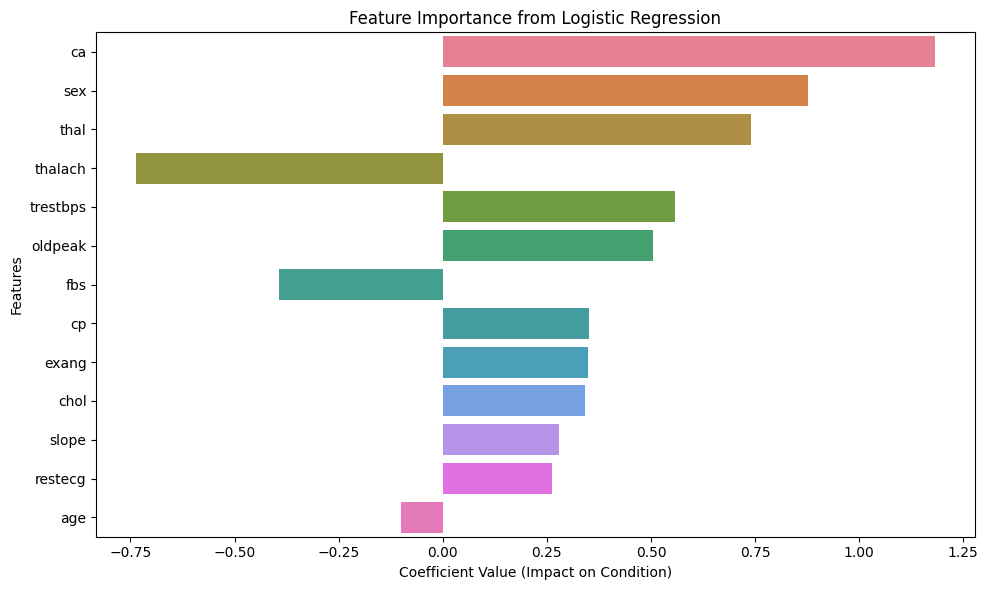

In [11]:
# Visualizing Feature Importance

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue = 'Feature', legend = False)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value (Impact on Condition)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


#### **The features with the strongest association with heart diseases include "ca", "sex", "thal", "thalach", "trestbps", "oldpeak", and "fbs".**

### **RESEARCH QUESTION TWO: How does age affect the likelihood of developing heart disease?**

#### **Age Distribution Plots**

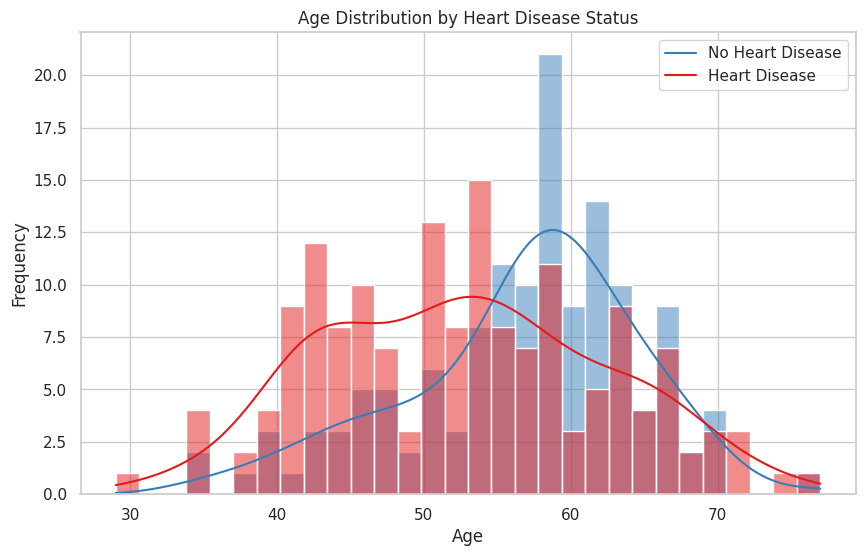

In [12]:
# Set visualization style
sns.set(style="whitegrid")

# Age distribution plots by heart disease status
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x='age', hue='condition', kde=True, bins=30, palette='Set1')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


#### **There is a higher density of heart disease cases for people between the age of 40 & 60**

### **RESEARCH QUESTION THREE: Is there a gender difference in heart disease prevalence and key risk factors?**

#### **Grouped Bar Charts for Gender Comparison**

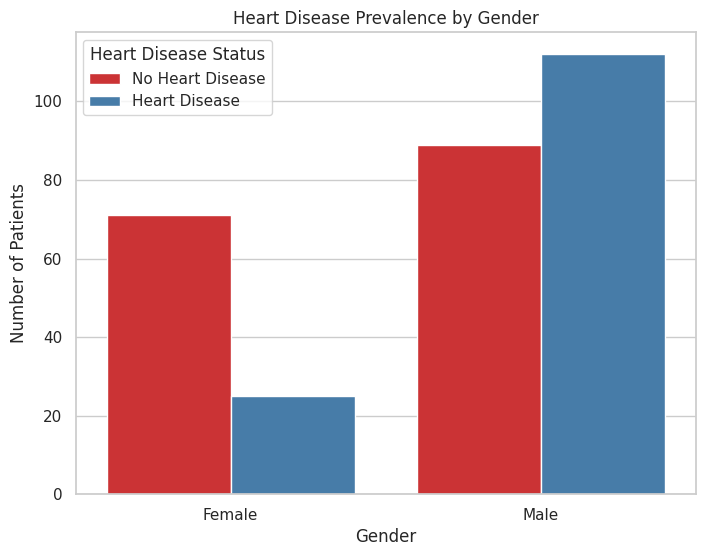

In [13]:
# Grouping data by gender and heart disease status
gender_heart_disease = heart_data.groupby(['sex', 'condition']).size().reset_index(name='count')

# Mapping 'sex' for clarity (assuming 1=Male, 0=Female in the dataset)
gender_heart_disease['sex'] = gender_heart_disease['sex'].map({1: 'Male', 0: 'Female'})
gender_heart_disease['condition'] = gender_heart_disease['condition'].map({1: 'Heart Disease', 0: 'No Heart Disease'})

# Plotting grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_heart_disease, x='sex', y='count', hue='condition', palette='Set1')
plt.title('Heart Disease Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease Status')
plt.show()


#### **Chi-Square Tests for Categorical Features Across Genders**

In [14]:
from scipy.stats import chi2_contingency

# Example categorical features: chest pain type (cp), fasting blood sugar (fbs), restecg
categorical_features = ['cp', 'fbs', 'restecg', 'exang']

for feature in categorical_features:
    contingency_table = pd.crosstab(heart_data['sex'], heart_data[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test for {feature}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("✅ Significant difference between genders.")
    else:
        print("❌ No significant difference between genders.")



Chi-Square Test for cp:
Chi2 Statistic: 6.7332, p-value: 0.0809
❌ No significant difference between genders.

Chi-Square Test for fbs:
Chi2 Statistic: 0.2433, p-value: 0.6218
❌ No significant difference between genders.

Chi-Square Test for restecg:
Chi2 Statistic: 3.7179, p-value: 0.1558
❌ No significant difference between genders.

Chi-Square Test for exang:
Chi2 Statistic: 5.4857, p-value: 0.0192
✅ Significant difference between genders.


### **RESEARCH QUESTION FOUR: How do chest pain types correlate with heart disease outcomes?**

In [17]:
# Map chest pain types for clarity (based on UCI dataset description)
cp_mapping = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}
heart_data['cp_type'] = heart_data['cp'].map(cp_mapping)
heart_data['heart_disease'] = heart_data['condition'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

#### **Stacked Bar Plots of Chest Pain Types vs. Heart Disease Diagnosis**

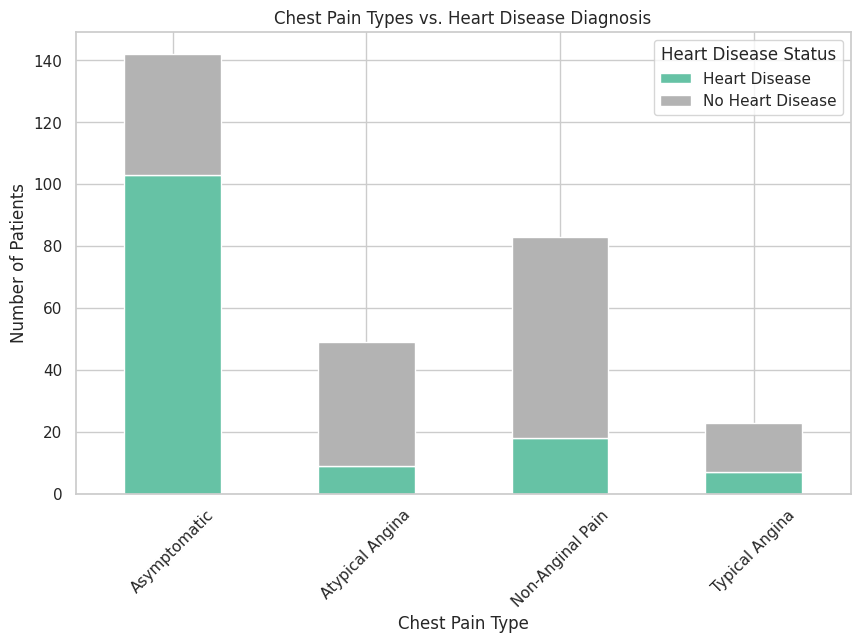

In [18]:
# Grouping data for stacked bar plot
cp_outcome = heart_data.groupby(['cp_type', 'heart_disease']).size().unstack().fillna(0)

# Stacked bar plot
cp_outcome.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Chest Pain Types vs. Heart Disease Diagnosis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease Status')
plt.xticks(rotation=45)
plt.show()


In [ ]:
heart_data

#### **ANOVA Test to Check Statistical Significance**

In [22]:
from scipy.stats import f_oneway

# Extract chest pain type groups
cp_0 = heart_data[heart_data["cp"] == 0]["condition"]
cp_1 = heart_data[heart_data["cp"] == 1]["condition"]
cp_2 = heart_data[heart_data["cp"] == 2]["condition"]
cp_3 = heart_data[heart_data["cp"] == 3]["condition"]


In [23]:
# Perform ANOVA test
anova_stat, p_value = f_oneway(cp_0, cp_1, cp_2, cp_3)

print(f"ANOVA Statistic: {anova_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference in heart disease rates across chest pain types.")
else:
    print("❌ No significant difference found.")


ANOVA Statistic: 34.3488, p-value: 0.0000
✅ Significant difference in heart disease rates across chest pain types.


### **Visualizing Proportions of Heart Disease per Chest Pain Type**

In [32]:
# Calculate proportion of heart disease within each chest pain category
proportion_df = heart_data.groupby('cp_type')['condition'].mean().reset_index()
proportion_df.rename(columns={'condition': 'Proportion_with_Heart_Disease'}, inplace=True)

print(proportion_df)

            cp_type  Proportion_with_Heart_Disease
0      Asymptomatic                       0.725352
1   Atypical Angina                       0.183673
2  Non-Anginal Pain                       0.216867
3    Typical Angina                       0.304348


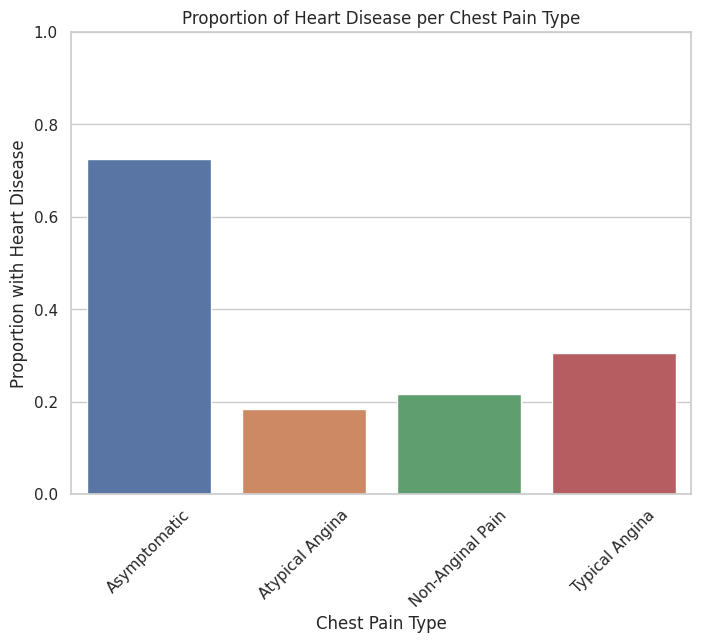

In [29]:
# Bar plot for proportions
plt.figure(figsize=(8, 6))
sns.barplot(data=proportion_df, x='cp_type', y='Proportion_with_Heart_Disease', hue = 'cp_type', legend = False)
plt.title('Proportion of Heart Disease per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion with Heart Disease')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### **RESEARCH QUESTION FIVE: Can maximum heart rate achieved (thalach) predict heart disease presence?**

#### **Boxplots of Thalach by Heart Disease Status**

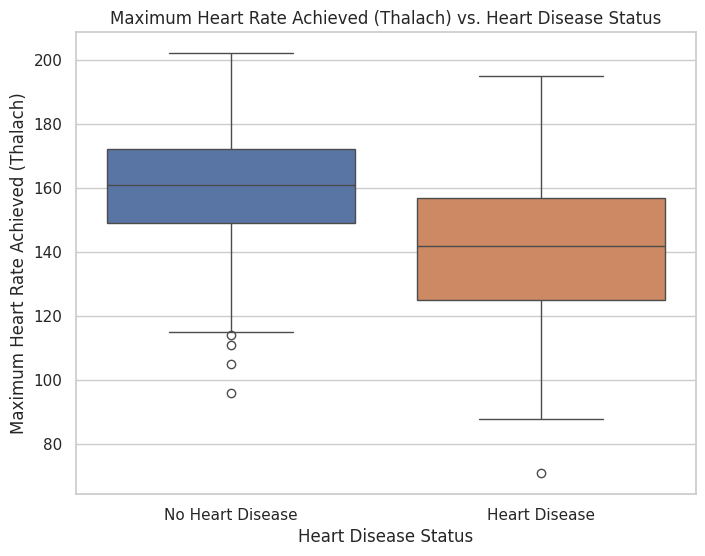

In [35]:
# Boxplot of thalach by heart disease status
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_data, x='heart_disease', y='thalach', hue='heart_disease', legend=False)
plt.title('Maximum Heart Rate Achieved (Thalach) vs. Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Maximum Heart Rate Achieved (Thalach)')
plt.show()


#### **Patients without heart disease have higher maximum heart rates on average.**

#### **Point biserial correlation**

In [43]:
from scipy.stats import pointbiserialr

# Point biserial correlation
correlation, p_value = pointbiserialr(heart_data['thalach'], heart_data['condition'])
print(f"Point Biserial Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ There is a significant relationship between thalach and heart disease presence.")
else:
    print("❌ No significant relationship found between thalach and heart disease presence.")


Point Biserial Correlation: -0.4238
P-value: 0.0000
✅ There is a significant relationship between thalach and heart disease presence.


#### **There is a moderate negative correlation between thalach and heart disease presence**

---



### **RESEARCH QUESTION SIX: How does resting blood pressure (trestbps) vary between patients with and without heart disease?**

#### **KDE Plots to Compare Blood Pressure Distributions**

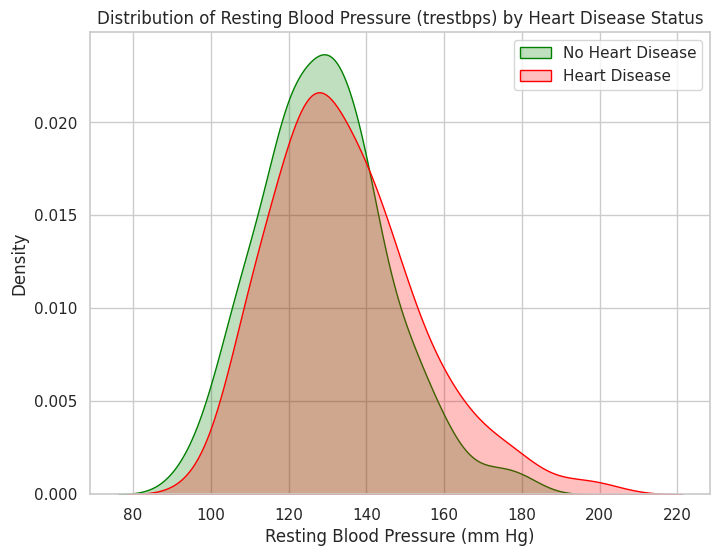

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart_data[heart_data['condition'] == 0], x='trestbps', label='No Heart Disease', fill=True, color='green')
sns.kdeplot(data=heart_data[heart_data['condition'] == 1], x='trestbps', label='Heart Disease', fill=True, color='red')
plt.title('Distribution of Resting Blood Pressure (trestbps) by Heart Disease Status')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')
plt.legend()
plt.show()


#### **Patients without heart diseases tend to have hihger blood pressure**

#### **T-Test for Statistical Significance**

In [47]:
from scipy.stats import ttest_ind

# Separate groups
no_disease = heart_data[heart_data['condition'] == 0]['trestbps']
disease = heart_data[heart_data['condition'] == 1]['trestbps']

# Perform independent t-test
t_stat, p_value = ttest_ind(no_disease, disease, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The difference in resting blood pressure between groups is statistically significant.")
else:
    print("❌ No significant difference in resting blood pressure between groups.")


T-statistic: -2.6385
P-value: 0.0088
✅ The difference in resting blood pressure between groups is statistically significant.
